In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

import preprocessing
import postprocessing
import algorithms
import plots
import utils

In [2]:
DATA_PATH_1 = Path("../data/data.mat")
DATA_PATH_2 = Path("../data/weights.mat")

# Part 1

## Multi-class Classification
For this exercise, you will use logistic regression and neural networks to
recognize handwritten digits (from 0 to 9). Automated handwritten digit
recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. This
exercise will show you how the methods you’ve learned can be used for this
classification task.

In the first part of the exercise, you will extend your previous implemen-
tion of logistic regression and apply it to one-vs-all classification.

## Dataset
You are given a data set in ex3data1.mat that contains 5000 training exam-
ples of handwritten digits.2 The .mat format means that that the data has
been saved in a native Octave/MATLAB matrix format, instead of a text
(ASCII) format like a csv-file. These matrices can be read directly into your
program by using the load command. After loading, matrices of the correct
dimensions and values will appear in your program’s memory. The matrix
will already be named, so you do not need to assign names to them.

In [3]:
x, y = preprocessing.read_data(DATA_PATH_1)

## Visualizing the data
You will begin by visualizing a subset of the training set. In Part 1 of ex3.m,
the code randomly selects selects 100 rows from X and passes those rows
to the displayData function. This function maps each row to a 20 pixel by
20 pixel grayscale image and displays the images together.

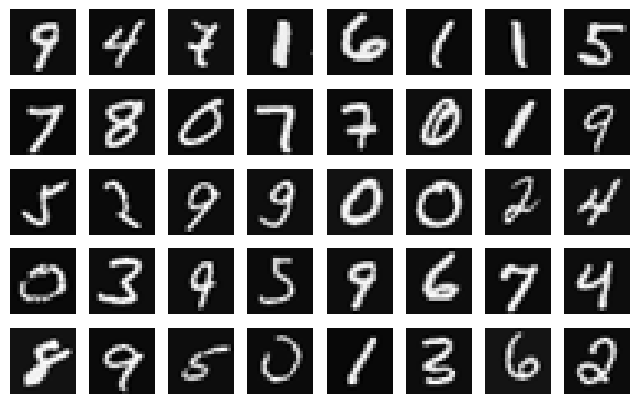

In [4]:
n = 40
random_indices = utils.select_n_random_rows(x, n)
plots.display_grid_of_rows(x, random_indices)

## Preprocessing
Prepend a column of ones to the input array and map the labels to a range from 0 to 9.

In [5]:
x = preprocessing.include_intercept(x)
y = preprocessing.map_labels(y)

## Vectorizing Logistic Regression
You will be using multiple one-vs-all logistic regression models to build a multi-class classifier. Since there are 10 classes, you will need to train 10 separate logistic regression classifiers. To make this training efficient, it is important to ensure that your code is well vectorized. In this section, you will implement a vectorized version of logistic regression that does not employ any for loops. You can use your code in the last exercise as a starting point for this exercise.

## Vectorizing the cost function
We will begin by writing a vectorized version of the cost function. Recall
that in (unregularized) logistic regression, the cost function is

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1 - h_{\theta}(x^{(i)}))]$$

To compute each element in the summation, we have to compute $h_{\theta}(x^{(i)})$ for every example i, where $h_{\theta}(x^{(i)}) = g( \Theta ^T x^{(i)})$  and $g(z) = \frac{1}{1+e^{−z}}$ is the sigmoid function. It turns out that we can compute this quickly for all our examples by using matrix multiplication. Let us define X and $\Theta$ as:

$$
X = \begin{bmatrix}
  -(x^{(1)})^T- \\
  -(x^{(2)})^T- \\
  \vdots \\
  -(x^{(m)})^T- \\
\end{bmatrix}
$$

$$
\Theta = \begin{bmatrix}
  \theta_1 \\
  \theta_2 \\
  \vdots \\
  \theta_n \\
\end{bmatrix}
$$

Then, by computing the matrix product $X\Theta$, we have

$$
X\Theta = \begin{bmatrix}
  -(x^{(1)})^T\Theta- \\
  -(x^{(2)})^T\Theta- \\
  \vdots \\
  -(x^{(m)})^T\Theta- \\
\end{bmatrix}
$$

Your job is to write the unregularized cost function in the file lrCostFunction.m
Your implementation should use the strategy we presented above to calculate $\Theta^T x^{(i)}$. You should also use a vectorized approach for the rest of the cost function. A fully vectorized version of lrCostFunction.m should not contain any loops.

## Vectorizing the gradient
Recall that the gradient of the (unregularized) logistic regression cost is a
vector where the j th element is defined as

$$\frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

To vectorize this operation over the dataset, we start by writing out all the partial derivatives explicitly for all $\theta_j$ ,

$$
\begin{bmatrix}
  \frac{\partial}{\partial \theta_0}  J(\theta) \\
  \frac{\partial}{\partial \theta_1}  J(\theta) \\
  \vdots \\
  \frac{\partial}{\partial \theta_n}  J(\theta) \\
\end{bmatrix} = \frac{1}{m} \begin{bmatrix}
  \sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})x_0^{(i)}) \\
  \sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})x_1^{(i)}) \\
  \vdots \\
  \sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})x_n^{(i)}) \\
\end{bmatrix}
$$

$$=\frac{1}{m} \sum_{i=1}^{m}((h_{\theta}(x^{(i)})-y^{(i)})x^{(i)})$$

$$=\frac{1}{m} X^T(h_{\theta}(x)-y)$$

If you are comfortable with linear algebra, we encourage
you to work through the matrix multiplications above to convince yourself
that the vectorized version does the same computations. You should now
implement Equation 1 to compute the correct vectorized gradient. Once you
are done, complete the function lrCostFunction.m by implementing the
gradient.

## Vectorizing regularized logistic regression
After you have implemented vectorization for logistic regression, you will now
add regularization to the cost function. Recall that for regularized logistic
regression, the cost function is defined as

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)}log(h_{\theta}(x^{(i)})) - (1-y^{(i)})log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$$

Note that you should not be regularizing $\theta_0$ which is used for the bias term.

Correspondingly, the partial derivative of regularized logistic regression cost for $\theta_j$ is defined as

$$\frac{\partial}{\partial \theta_0} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)} \quad for\;j=0$$

$$\frac{\partial}{\partial \theta_j} J(\theta) = (\frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}) + \frac{\lambda}{m}\theta_j \quad for\;j\ge1$$

Now modify your code in lrCostFunction to account for regularization.
Once again, you should not put any loops into your code.

In [6]:
model = algorithms.MulticlassLogisticRegression()
model.fit(x, y)

Optimizing digit 0
Optimizing digit 1
Optimizing digit 2
Optimizing digit 3
Optimizing digit 4
Optimizing digit 5
Optimizing digit 6
Optimizing digit 7
Optimizing digit 8
Optimizing digit 9


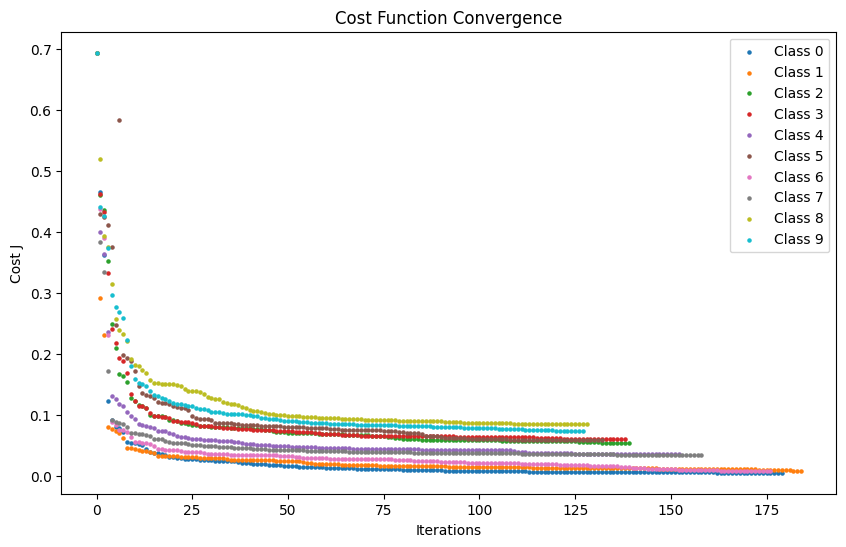

In [7]:
plots.plot_cost_function(model.cost_history)

## One-vs-all Classification
In this part of the exercise, you will implement one-vs-all classification by training multiple regularized logistic regression classifiers, one for each of the K classes in our dataset (Figure 1). In the handwritten digits dataset, $K = 10$, but your code should work for any value of K.

You should now complete the code in oneVsAll.m to train one classifier for each class. In particular, your code should return all the classifier parameters in a matrix $\Theta \in R^{K \times (N +1)}$, where each row of $\Theta$ corresponds to the learned logistic regression parameters for one class. You can do this with a “for”-loop from 1 to K, training each classifier independently.

Note that the y argument to this function is a vector of labels from 1 to 10, where we have mapped the digit “0” to the label 10 (to avoid confusions with indexing).

When training the classifier for class $k \in {1, ..., K}$, you will want a m-dimensional vector of labels y, where $y_j \in 0, 1$ indicates whether the j-th training instance belongs to class $k (y_j = 1)$, or if it belongs to a different class $(y_j = 0)$. You may find logical arrays helpful for this task.

## One-vs-all Prediction
After training your one-vs-all classifier, you can now use it to predict the
digit contained in a given image. For each input, you should compute the
“probability” that it belongs to each class using the trained logistic regression
classifiers. Your one-vs-all prediction function will pick the class for which the
corresponding logistic regression classifier outputs the highest probability and
return the class label (1, 2,..., or K) as the prediction for the input example.
You should now complete the code in predictOneVsAll.m to use the
one-vs-all classifier to make predictions.
Once you are done, ex3.m will call your predictOneVsAll function using
the learned value of Θ. You should see that the training set accuracy is about
94.9% (i.e., it classifies 94.9% of the examples in the training set correctly).

In [8]:
# Expected 94.9
print("\nCorrect predictions for training data:\n")
accuracy = postprocessing.accuracy(x, y, model)
print(f"{accuracy: .3f}\n")


Correct predictions for training data:

 0.952



# Part 2

## Neural Networks
In the previous part of this exercise, you implemented multi-class logistic regression to recognize handwritten digits. However, logistic regression cannot form more complex hypotheses as it is only a linear classifier.3
In this part of the exercise, you will implement a neural network to recognize handwritten digits using the same training set as before. The neural network will be able to represent complex models that form non-linear hypotheses. For this week, you will be using parameters from a neural network that we have already trained. Your goal is to implement the feedforward propagation algorithm to use our weights for prediction. In next week’s exercise, you will write the backpropagation algorithm for learning the neural network parameters.

In [9]:
x, y = preprocessing.read_data(DATA_PATH_1)
x = preprocessing.include_intercept(x)
y = preprocessing.map_labels(y)
theta = preprocessing.read_weights(DATA_PATH_2, ["Theta1", "Theta2"])

## Model representation
Our neural network is shown in Figure 2. It has 3 layers – an input layer, a
hidden layer and an output layer. Recall that our inputs are pixel values of
digit images. Since the images are of size 20×20, this gives us 400 input layer
units (excluding the extra bias unit which always outputs +1). As before,
the training data will be loaded into the variables X and y.
You have been provided with a set of network parameters (Θ(1) , Θ(2) )
already trained by us. These are stored in ex3weights.mat and will be
loaded by ex3 nn.m into Theta1 and Theta2 The parameters have dimensions
that are sized for a neural network with 25 units in the second layer and 10
output units (corresponding to the 10 digit classes).

In [10]:
input_layer_size = 400
hidden_layer_size = 25
output_layer_size = 10
model = algorithms.NeuralNetwork(input_layer_size, hidden_layer_size, output_layer_size)

## Feedforward Propagation and Prediction
Now you will implement feedforward propagation for the neural network. You will need to complete the code in predict.m to return the neural network’s prediction.

You should implement the feedforward computation that computes $h_{\theta}(x^{(i)})$ for every example i and returns the associated predictions. Similar to the one-vs-all classification strategy, the prediction from the neural network will be the label that has the largest output $(h_{\theta}(x))_k$.

Once you are done, ex3 nn.m will call your predict function using the loaded set of parameters for Theta1 and Theta2. You should see that the accuracy is about 97.5%. After that, an interactive sequence will launch displaying images from the training set one at a time, while the console prints out the predicted label for the displayed image.

In [11]:
model.theta_1 = theta[0]
model.theta_2 = theta[1]

In [12]:
# Expected 97.5
print("Part 2:\n")
print("Training set accuracy:\n")
accuracy = postprocessing.accuracy(x, y, model)
print(f"{accuracy: .3f}\n")

Part 2:

Training set accuracy:

 0.975

